# Homework 3

## Pair Programming Group Number: 28
## Members of Team: Michael Walters, Adrian Garcia

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [ ]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv("https://gist.githubusercontent.com/TieJean/797fc6b68b98dc93d9270c1d9b5759d5/raw/a2d467663d9320913ca4b3c52aa75bb20e42988e/melb_data_sold_train.csv/")

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [ ]:
df1 = df.dropna()
df1 = df1.reset_index().drop(["index"], axis = 1)
df1


,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan


## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [ ]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):

  #convert to radians
  pt1[0], pt1[1] = (pt1[0] * (np.pi/180)), (pt1[1] * (np.pi/180))
  pt2[0], pt2[1] = (pt2[0] * (np.pi/180)), (pt2[1] * (np.pi/180))

  #setting up difference between lat and long
  lat_dif = pt2[0] - pt1[0]
  long_dif = pt2[1] - pt1[1]

  #beginning with the hav function
  hav = (pow(np.sin(lat_dif / 2), 2) + pow(np.sin(long_dif / 2), 2) * np.cos(pt1[0]) * np.cos(pt2[0]))

  #taking the inverse of the hav to get distance (using r_earth as radius of earth)
  r_earth = 6371
  distance = 2 * r_earth * np.arcsin(np.sqrt(hav))

  return distance


In [ ]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])


30.244730737767764

In [ ]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`

df2 = df1.copy()
df2["distance_to_toorak"] = haversine_distance([-37.841820, 145.015986],[df2["Lattitude"], df2["Longtitude"]])
df2

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261606
1,Abbotsford,124 Yarra St,3,h,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621837
2,Abbotsford,98 Charles St,2,h,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374200
3,Abbotsford,10 Valiant St,2,h,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780648
4,Abbotsford,123/56 Nicholson St,2,u,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,h,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998823
3906,Greensborough,12 Yangoora Pl,4,h,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491597
3907,Highett,1/12 Jillian Av,3,t,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798768
3908,Highett,31 The Crescent,4,t,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986668


## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [ ]:
one_hot = pd.get_dummies(df2["Type"])
df3 = df2.drop("Type", axis = 1).join(one_hot)

df3

,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,h,t,u
0,Abbotsford,25 Bloomburg St,2,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4.261606,1,0,0
1,Abbotsford,124 Yarra St,3,1876000.0,7/05/2016,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4.621837,1,0,0
2,Abbotsford,98 Charles St,2,1636000.0,8/10/2016,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4.374200,1,0,0
3,Abbotsford,10 Valiant St,2,1097000.0,8/10/2016,3067.0,3.0,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.80100,144.99890,Northern Metropolitan,4.780648,1,0,0
4,Abbotsford,123/56 Nicholson St,2,750000.0,12/11/2016,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4.152007,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,Glenroy,69 Melbourne Av,3,680000.0,29/07/2017,3046.0,3.0,1.0,1.0,422.0,104.0,1960.0,Moreland,-37.70425,144.93164,Northern Metropolitan,16.998823,1,0,0
3906,Greensborough,12 Yangoora Pl,4,900000.0,29/07/2017,3088.0,4.0,3.0,1.0,807.0,190.0,1975.0,Banyule,-37.70077,145.12743,Northern Metropolitan,18.491597,1,0,0
3907,Highett,1/12 Jillian Av,3,1200000.0,29/07/2017,3190.0,3.0,1.0,2.0,269.0,125.0,2000.0,Bayside,-37.94775,145.02379,Southern Metropolitan,11.798768,0,1,0
3908,Highett,31 The Crescent,4,1200000.0,29/07/2017,3190.0,4.0,2.0,2.0,304.0,183.0,2007.0,Kingston,-37.94633,145.04947,Southern Metropolitan,11.986668,0,1,0


## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [ ]:
df3.corr(method = "pearson")

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,h,t,u
Rooms,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844,0.501128,-0.040762,-0.535102
Price,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013,0.391761,-0.095295,-0.372766
Postcode,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062,-0.040504,-0.008546,0.051754
Bedroom2,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515,0.484612,-0.037366,-0.518941
Bathroom,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662,0.181773,0.108148,-0.282390
Car,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759,0.214175,-0.006836,-0.236298
Landsize,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420,0.047422,-0.067257,-0.005103
BuildingArea,0.547816,0.465598,0.089355,0.532910,0.470554,0.299613,0.063136,1.000000,0.024754,-0.047501,0.084074,0.076668,0.306231,-0.032396,-0.321614
YearBuilt,-0.030447,-0.330560,0.035561,-0.010031,0.192470,0.153313,0.028638,0.024754,1.000000,0.052205,0.023062,0.300236,-0.402670,0.331105,0.215689
Lattitude,0.012858,-0.224400,-0.445625,0.019970,-0.068643,-0.007839,0.010734,-0.047501,0.052205,1.000000,-0.366331,0.281684,0.121254,-0.028636,-0.115991


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [ ]:
# Step one, build the matrix X
dfx = df3.copy()
dfx = df3.drop(["Address", "Suburb", "Price", "Date", "CouncilArea", "Regionname"], axis =1)
x_matrix = dfx.to_numpy()
x_matrix

array([[2.000e+00, 3.067e+03, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 3.067e+03, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 3.067e+03, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.000e+00, 3.190e+03, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.000e+00, 3.190e+03, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.000e+00, 3.037e+03, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
# Step two, build the column vector y
y_matrix = df3["Price"].to_numpy()
y_matrix

array([1035000., 1876000., 1636000., ..., 1200000., 1200000.,  618350.])

In [ ]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
xtrans = np.transpose(x_matrix)
x_pseudo = np.linalg.inv(np.matmul(xtrans,x_matrix))
b_hat = np.matmul(np.matmul(x_pseudo,xtrans),y_matrix)
b_hat

array([ 1.37519629e+05,  6.35591133e+02,  2.57774403e+04,  2.03540724e+05,
        5.44025950e+04,  1.94402030e+01,  1.22151756e+03, -3.11155825e+03,
       -6.16718944e+05, -2.09209147e+05, -4.35776773e+04,  1.17577845e+07,
        1.15678682e+07,  1.14252912e+07])

In [ ]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.matmul(dfx.iloc[23],b_hat) 

668241.4289602563

In [ ]:
# This is the actual price at this point
y_matrix[23]

805000.0

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [ ]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
url = "https://gist.githubusercontent.com/TieJean/e17178b1ffcb594dbf2232de90f8bb1f/raw/17c751b38a159b246321100188f35fa7cfb6c0b9/melb_data_sold_test.csv"
df4 = pd.read_csv(url)
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.

cols = ["Car", "BuildingArea", "YearBuilt"]
for col in cols:
  df4[col].fillna(df[col].mean(), inplace = True)

df4.isna().sum()



Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Date              0
Postcode          0
Bedroom2          0
Bathroom          0
Car               0
Landsize          0
BuildingArea      0
YearBuilt         0
CouncilArea     911
Lattitude         0
Longtitude        0
Regionname        0
dtype: int64

In [ ]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
df4["distance_to_toorak"] = haversine_distance([-37.841820, 145.015986],[df4["Lattitude"], df4["Longtitude"]])

one_hot = pd.get_dummies(df4["Type"])
df4 = df4.drop("Type", axis = 1).join(one_hot)

df4



,Suburb,Address,Rooms,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,distance_to_toorak,h,t,u
0,Jacana,29 Fox Ct,3,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,144.881713,1962.73913,Hume,-37.68907,144.91459,Northern Metropolitan,19.181540,1,0,0
1,Keilor Park,45 Collinson St,3,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.000000,1980.00000,Brimbank,-37.72224,144.85739,Western Metropolitan,19.263042,1,0,0
2,Kensington,42 Gower St,3,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,144.881713,1962.73913,Melbourne,-37.79560,144.92779,Northern Metropolitan,9.296797,1,0,0
3,Kew,6/385 Barkers Rd,3,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.000000,1980.00000,Boroondara,-37.81614,145.05056,Southern Metropolitan,4.168245,0,1,0
4,Kew,11 Raheen Dr,4,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.000000,1970.00000,Boroondara,-37.80437,145.01725,Southern Metropolitan,4.165730,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,717.0,191.000000,1980.00000,NaN,-37.86887,145.22116,Eastern Metropolitan,18.262714,1,0,0
1017,Werribee,5 Nuragi Ct,4,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,172.000000,1980.00000,NaN,-37.89327,144.64789,Western Metropolitan,32.814304,1,0,0
1018,Westmeadows,9 Black St,3,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,144.881713,1962.73913,NaN,-37.67917,144.89390,Northern Metropolitan,21.030489,1,0,0
1019,Wheelers Hill,12 Strada Cr,4,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,144.881713,1981.00000,NaN,-37.90562,145.16761,South-Eastern Metropolitan,15.081312,1,0,0


In [ ]:
# Step two, build the attribute matrix Xdot 
x = df4.copy()
Xdot = x.drop(["Address", "Suburb", "Price", "Date", "CouncilArea", "Regionname"], axis =1)
Xdot = dfx.to_numpy()
Xdot

array([[2.000e+00, 3.067e+03, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 3.067e+03, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 3.067e+03, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.000e+00, 3.190e+03, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.000e+00, 3.190e+03, 4.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.000e+00, 3.037e+03, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
y_hat = np.matmul(Xdot, b_hat)
y_hat

array([1222040.93437454, 1724965.25709589, 1391611.46121698, ...,
        881073.56151765, 1283222.39662914,  548317.38463181])

In [ ]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
error = y_matrix - y_hat
error

array([-187040.93437454,  151034.74290411,  244388.53878302, ...,
        318926.43848235,  -83222.39662914,   70032.61536819])

Text(0, 0.5, 'Count')

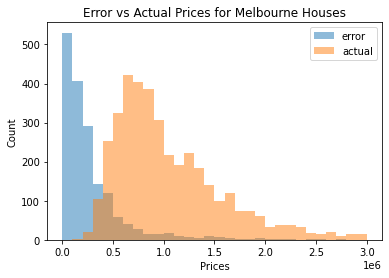

In [ ]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,
        1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000,
        2100000,2200000,2300000,2400000,2500000,2600000,2700000,2800000,2900000,3000000]
        
plt.hist(error, bins = bins, alpha = 0.5, label = "error")
plt.hist(y_matrix, bins = bins, alpha = 0.5, label = "actual")

plt.legend()
plt.title("Error vs Actual Prices for Melbourne Houses")
plt.xlabel("Prices")
plt.ylabel("Count")